# Dave - Modèles d'apprentissage (peu) profonds

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import argparse
import torch
import time

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
data = pd.read_csv("cleaned_data.csv")
X = data.iloc[:,0:-1]
Y = data.iloc[:,-1]
y = np.zeros((len(Y), 10))
for i in range(len(Y)):
    y[i][int(Y[i])] = 1 
labels = ["C201", "C203", "C204", "C205", "C206", "C207", "C208", "C210", "DC", "MC"]

## I - Chargement, partionnement et normalisation des données

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

In [5]:
# define training hyperparameters
INIT_LR = 1e-3
BATCH_SIZE = 64
EPOCHS = 10
# define the train and val splits
TRAIN_SPLIT = 0.9
VAL_SPLIT = 1 - TRAIN_SPLIT
# set the device we will be using to train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=VAL_SPLIT, random_state=42)

## II - Modèle séquentiel

#### A) Entraînement

In [7]:
model = Sequential()
model.add(Dense(51, input_shape=(51,), activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

In [8]:
st = time.time()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=125, batch_size=10)
et = time.time()
elapsed = et - st
print("Exec time: %f seconds" % elapsed)

Epoch 1/125
432/432 [==============================] - 1s 2ms/step - loss: 0.6137 - accuracy: 0.3093 - val_loss: 0.2131 - val_accuracy: 0.6146
Epoch 2/125
432/432 [==============================] - 1s 1ms/step - loss: 0.1810 - accuracy: 0.7012 - val_loss: 0.1374 - val_accuracy: 0.8396
Epoch 3/125
432/432 [==============================] - 1s 1ms/step - loss: 0.1240 - accuracy: 0.8347 - val_loss: 0.1042 - val_accuracy: 0.8687
Epoch 4/125
432/432 [==============================] - 1s 1ms/step - loss: 0.0935 - accuracy: 0.8975 - val_loss: 0.0837 - val_accuracy: 0.9021
Epoch 5/125
432/432 [==============================] - 1s 1ms/step - loss: 0.0811 - accuracy: 0.9072 - val_loss: 0.0885 - val_accuracy: 0.8875
Epoch 6/125
432/432 [==============================] - 1s 1ms/step - loss: 0.0690 - accuracy: 0.9294 - val_loss: 0.0944 - val_accuracy: 0.9042
Epoch 7/125
432/432 [==============================] - 1s 1ms/step - loss: 0.0644 - accuracy: 0.9266 - val_loss: 0.0716 - val_accuracy: 0.9042

Epoch 58/125
432/432 [==============================] - 1s 1ms/step - loss: 0.0082 - accuracy: 0.9898 - val_loss: 0.0151 - val_accuracy: 0.9729
Epoch 59/125
432/432 [==============================] - 1s 2ms/step - loss: 0.0082 - accuracy: 0.9891 - val_loss: 0.0258 - val_accuracy: 0.9583
Epoch 60/125
432/432 [==============================] - 1s 1ms/step - loss: 0.0122 - accuracy: 0.9812 - val_loss: 0.0045 - val_accuracy: 0.9958
Epoch 61/125
432/432 [==============================] - 1s 2ms/step - loss: 0.0124 - accuracy: 0.9812 - val_loss: 0.0339 - val_accuracy: 0.9500
Epoch 62/125
432/432 [==============================] - 1s 1ms/step - loss: 0.0124 - accuracy: 0.9817 - val_loss: 0.0423 - val_accuracy: 0.9458
Epoch 63/125
432/432 [==============================] - 1s 1ms/step - loss: 0.0084 - accuracy: 0.9891 - val_loss: 0.0146 - val_accuracy: 0.9708
Epoch 64/125
432/432 [==============================] - 1s 1ms/step - loss: 0.0118 - accuracy: 0.9826 - val_loss: 0.0083 - val_accuracy:

Epoch 115/125
432/432 [==============================] - 1s 1ms/step - loss: 0.0077 - accuracy: 0.9882 - val_loss: 0.0154 - val_accuracy: 0.9729
Epoch 116/125
432/432 [==============================] - 1s 1ms/step - loss: 0.0048 - accuracy: 0.9926 - val_loss: 0.0060 - val_accuracy: 0.9854
Epoch 117/125
432/432 [==============================] - 1s 1ms/step - loss: 0.0077 - accuracy: 0.9891 - val_loss: 0.0151 - val_accuracy: 0.9771
Epoch 118/125
432/432 [==============================] - 1s 1ms/step - loss: 0.0054 - accuracy: 0.9917 - val_loss: 0.0140 - val_accuracy: 0.9792
Epoch 119/125
432/432 [==============================] - 1s 2ms/step - loss: 0.0057 - accuracy: 0.9924 - val_loss: 0.0072 - val_accuracy: 0.9917
Epoch 120/125
432/432 [==============================] - 1s 1ms/step - loss: 0.0117 - accuracy: 0.9831 - val_loss: 0.0104 - val_accuracy: 0.9792
Epoch 121/125
432/432 [==============================] - 1s 1ms/step - loss: 0.0062 - accuracy: 0.9919 - val_loss: 0.0044 - val_ac

#### B) Phase de test

In [9]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

38/38 [==============================] - 0s 999us/step - loss: 0.0022 - accuracy: 0.9967
Accuracy: 99.67


####  C) Sauvegarde et résultats

In [10]:
import pickle
with open("model_nn.sav", "wb") as file:
    pickle.dump(model, file)

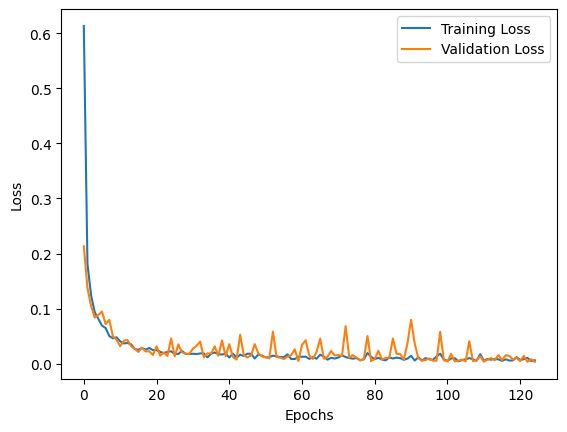

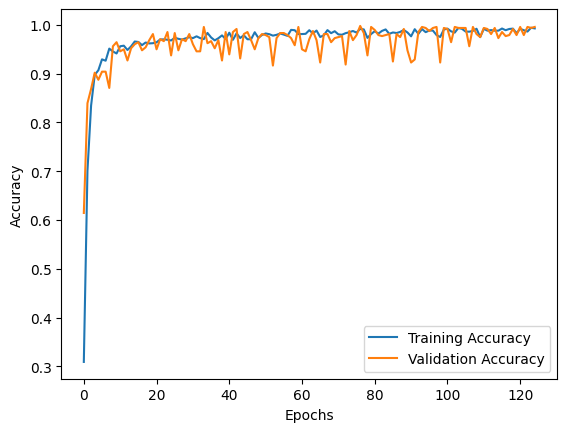

In [11]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()